In [35]:
# required libraries

import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import nltk
from collections import Counter    
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### EDA

In [36]:
df = pd.read_csv('BA_reviews1.csv')
df.head(2)     

,title,review,country,date,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft
0,"""My baggage never arrived""",Not Verified | Lost my case and took 6 weeks ...,United Kingdom,2023-03-12,Business,Business Class,London to Dubai,December 2022,4.0,4.0,4.0,4.0,1.0,12345.0,1,no,NaN
1,"""Total disruption, wasted time""",✅ Trip Verified | The incoming and outgoing f...,United Kingdom,2023-03-10,Solo Leisure,Economy Class,Geneva to London,March 2023,2.0,3.0,3.0,NaN,1.0,NaN,2,no,A320


In [37]:
df[['Verified', 'review']] = df['review'].str.split('|', expand=True)
df.head(2)

,title,review,country,date,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,Verified
0,"""My baggage never arrived""",Lost my case and took 6 weeks to locate it a...,United Kingdom,2023-03-12,Business,Business Class,London to Dubai,December 2022,4.0,4.0,4.0,4.0,1.0,12345.0,1,no,NaN,Not Verified
1,"""Total disruption, wasted time""",The incoming and outgoing flight was delayed...,United Kingdom,2023-03-10,Solo Leisure,Economy Class,Geneva to London,March 2023,2.0,3.0,3.0,NaN,1.0,NaN,2,no,A320,✅ Trip Verified


In [38]:
df.Verified.value_counts() 

✅ Trip Verified     826
Not Verified        172
❎ Not Verified        2
Name: Verified, dtype: int64

In [39]:
# fixing typos

df.Verified = df.Verified.replace('❎ Not Verified ' , 'Not Verified ') 
df.Verified = df.Verified.replace('✅ Trip Verified ' , 'Verified ') 


In [74]:
df.Recommended.value_counts()   

no     634
yes    366
Name: Recommended, dtype: int64

In [76]:
df['Recommended'].value_counts(normalize=True) * 100 

no     63.4
yes    36.6
Name: Recommended, dtype: float64

In [41]:
import re 
df_rev = df[['review' ,'Recommended' ]] 

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)  
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

# Cleaning the text in the review column
df_rev['Cleaned Reviews'] = df_rev['review'].apply(clean)
df_rev.head()
 

C:\Users\ahmed\AppData\Local\Temp\ipykernel_12332\1297925108.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev['Cleaned Reviews'] = df_rev['review'].apply(clean)


,review,Recommended,Cleaned Reviews
0,Lost my case and took 6 weeks to locate it a...,no,lost my case and took weeks to locate it and ...
1,The incoming and outgoing flight was delayed...,no,the incoming and outgoing flight was delayed ...
2,Back in December my family and I as we were ...,no,back in december my family and i as we were g...
3,"As usual the flight is delayed this week, it...",no,as usual the flight is delayed this week it a...
4,A short BA euro trip and this is where BA exc...,yes,a short ba euro trip and this is where ba exc...


In [42]:
from collections import Counter

# check for commun words 

df_rev['Cleaned Reviews Split'] = df_rev['Cleaned Reviews'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df_rev['Cleaned Reviews Split'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']     
temp.style.background_gradient(cmap='Blues')     

C:\Users\ahmed\AppData\Local\Temp\ipykernel_12332\2899252352.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev['Cleaned Reviews Split'] = df_rev['Cleaned Reviews'].apply(lambda x:str(x).split())


,Common_words,count
0,the,7423
1,to,5129
2,and,4467
3,was,3395
4,a,3389
5,i,3244
6,in,2146
7,of,1986
8,on,1871
9,flight,1792


In [43]:

# check for commun words excluding stop words

from nltk.corpus import stopwords  
def remove_stopword(x):   
    return [y for y in x if y not in stopwords.words('english')]
df_rev['Cleaned Reviews No Stopwords'] = df_rev['Cleaned Reviews Split'].apply(lambda x:remove_stopword(x))
top = Counter([item for sublist in df_rev['Cleaned Reviews No Stopwords'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]   
temp.columns = ['Common_words','count']             
temp.style.background_gradient(cmap='Purples')   

C:\Users\ahmed\AppData\Local\Temp\ipykernel_12332\4150934572.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rev['Cleaned Reviews No Stopwords'] = df_rev['Cleaned Reviews Split'].apply(lambda x:remove_stopword(x))


,Common_words,count
1,ba,1194
2,service,722
3,london,668
4,seat,543
5,food,515
6,crew,499
7,time,487
8,good,450
9,class,437
10,seats,435


In [44]:
# splitting the data

Df_Recommended = df_rev[df_rev['Recommended']=='yes']
Df_Not_Recommended = df_rev[df_rev['Recommended']=='no'] 


In [45]:
# check for most commun words in positive feedback

top = Counter([item for sublist in Df_Recommended['Cleaned Reviews No Stopwords'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10)) 
temp_positive.columns = ['Common_words','count'] 
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,flight,632
1,ba,339
2,good,336
3,service,274
4,crew,268
5,food,243
6,time,226
7,london,221
8,cabin,214
9,seat,175


In [46]:
# check for most commun words in negative feedback

top = Counter([item for sublist in Df_Not_Recommended['Cleaned Reviews No Stopwords'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,ba,855
2,service,448
3,london,447
4,seat,368
5,class,322
6,one,314
7,business,299
8,seats,280
9,staff,276
10,food,272


In [80]:
# wordcloud for words

from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
stopwords = set(STOPWORDS)

def show_wordcloud(data , title):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.title(title ,fontdict={'size': 20, 'color': 'black', 
                                  'verticalalignment': 'bottom'})

    plt.imshow(wordcloud)
    plt.show()   

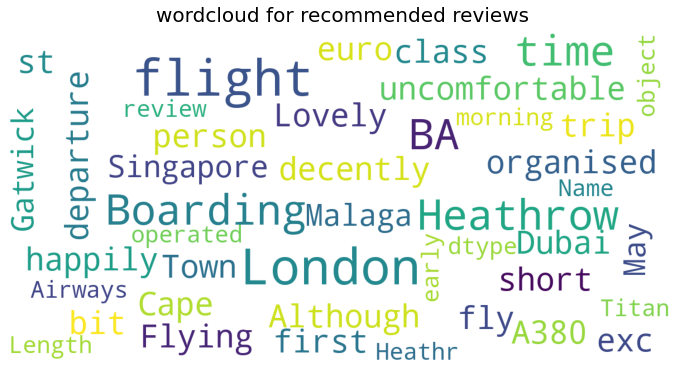

In [81]:
show_wordcloud(Df_Recommended.review , 'wordcloud for recommended reviews') 

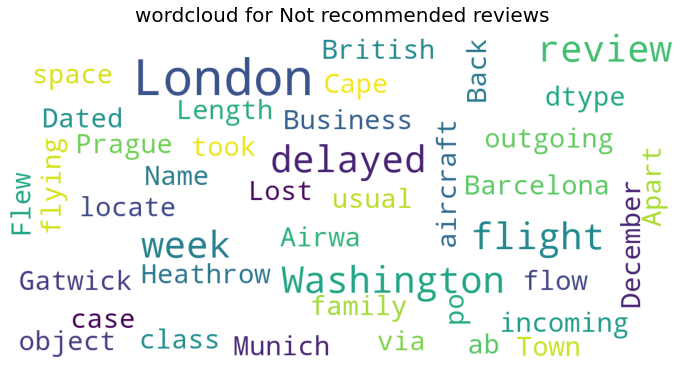

In [82]:
show_wordcloud(Df_Not_Recommended.review , 'wordcloud for Not recommended reviews')

##### distribution of features according to review sentiment

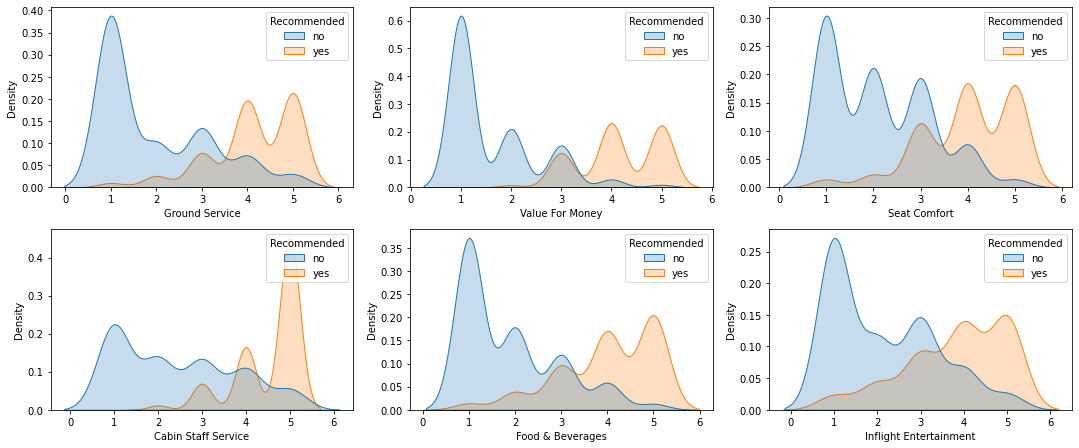

In [51]:



df_stars =  df[['Ground Service' , 'Value For Money','Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment']]
cols = 3  
rows = 3  
fig = plt.figure(figsize=(cols*5, rows*3))
for i, col in enumerate(df_stars):       
    ax=fig.add_subplot(rows,cols,i+1)     
    #sns.histplot( df, x=col, ax = ax)     
    sns.kdeplot(data = df, x = col, hue=df.Recommended, fill=True)    
fig.tight_layout()  
plt.show() 

In [52]:
# date feature engineering

df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda x: x.strftime('%B'))  
df['day'] = pd.to_datetime(df['date']).dt.strftime('%A')

In [53]:
df.month.value_counts()

October      105
January      103
June          97
December      94
July          90
August        79
September     75
February      74
May           74
March         71
November      71
April         67
Name: month, dtype: int64

##### Percentage of recommended flights by month 

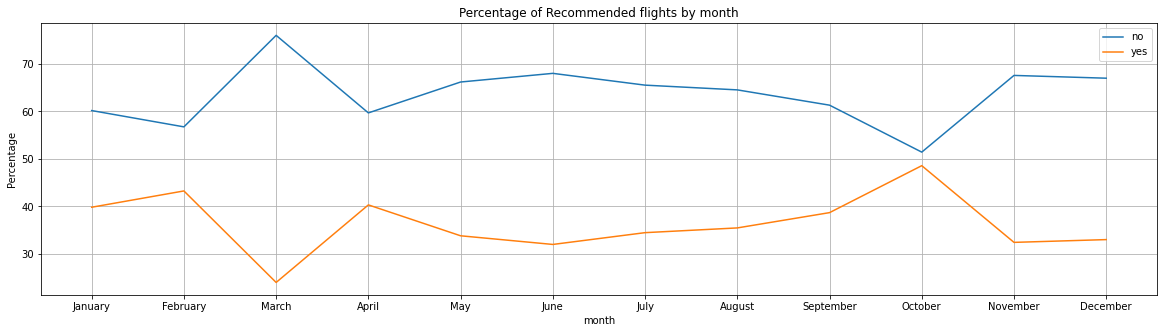

In [85]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',  'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)
def categ_line_pourcent(df_, x_, y_, Order=None):
    x, y = x_, y_

    # Calculate the percentages of each combination of values
    df1 = df_.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()  

    # Create the line chart
    sns.lineplot(x=x, y='percent', hue=y, data=df1, markers=True, sort=Order)

    # Add labels and legend   
    plt.xlabel(x)    
    plt.ylabel('Percentage')
    plt.title('Percentage of {} flights by {}'.format(y, x))
    plt.legend()

    # Show the chart 
    plt.show()  
plt.figure(figsize=(20,5)) 
plt.grid(True)   
categ_line_pourcent(df,'month','Recommended' , months ) 


##### Percentage of recommended flights by day 

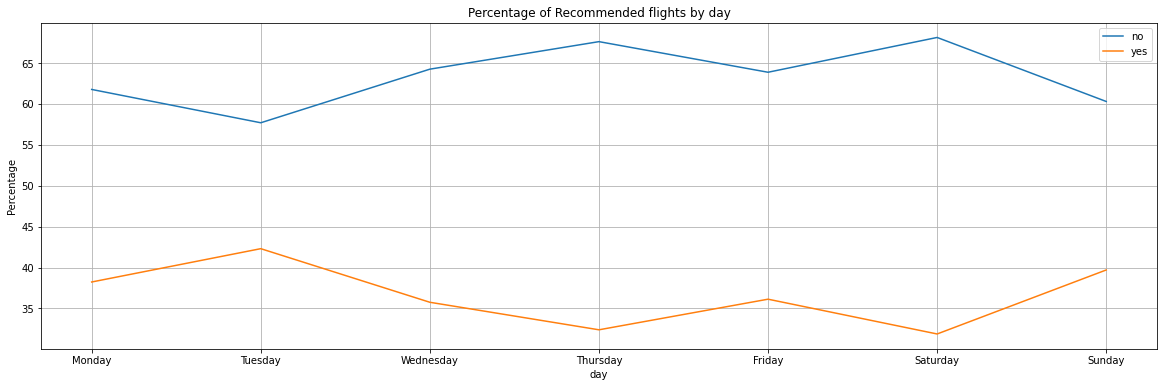

In [73]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=weekdays, ordered=True)

plt.figure(figsize=(20,6)) 
plt.grid(True)   
categ_line_pourcent(df,'day','Recommended' , weekdays ) 

##### Distribution of countries in dataset

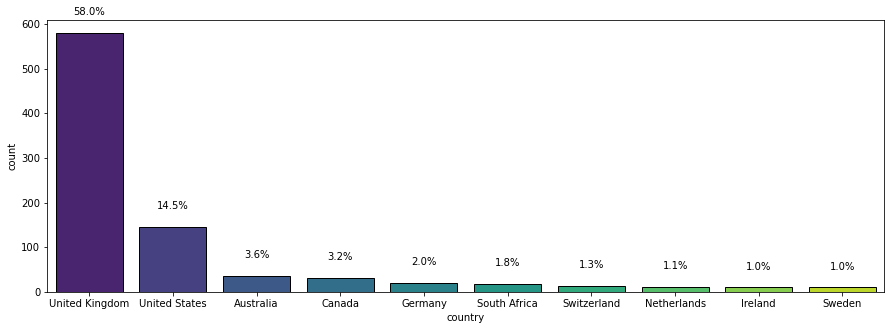

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

def value_count_percent(df, feature):
    fig, ax = plt.subplots(figsize=(15, 5))
    top_20 = df[feature].value_counts().nlargest(10)
    ax = sns.countplot(x=feature, data=df, palette='viridis', saturation=0.9, edgecolor="black",
                       order=top_20.index)  
    total = float(len(df))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height + 40, '{:.1f}%'.format((height/total)*100), ha="center")
    plt.show()

value_count_percent(df, "country")


In [57]:
df['Seat Type'].value_counts()  

Economy Class      545
Business Class     326
Premium Economy     89
First Class         40
Name: Seat Type, dtype: int64

##### Distribution of sentiments by seat type

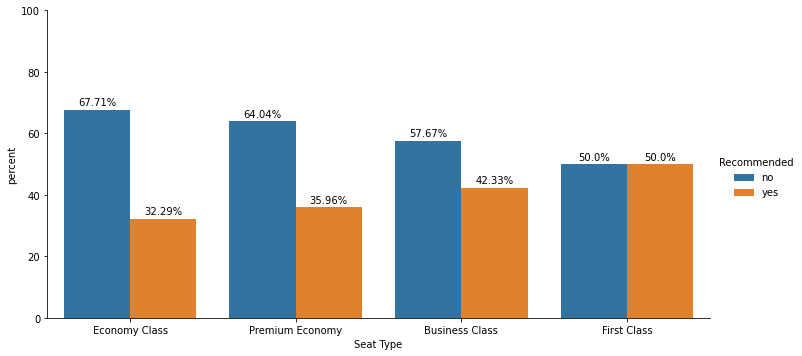

In [94]:
def categ_bar_pourcent(df_,x_,y_,aspect_ , Order = None ) : 
    x,y = x_, y_

    df1 = df_.groupby(x)[y].value_counts(normalize=True) 
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()
    df1 = df1.sort_values(['percent', y], ascending=[False, False])

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,aspect=aspect_ , order=Order)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height() +0.7   
        g.ax.text(txt_x,txt_y,txt ,ha='center' , va='bottom' ) 

categ_bar_pourcent(df,'Seat Type','Recommended' ,2 )  



##### Distribution of features by seat type

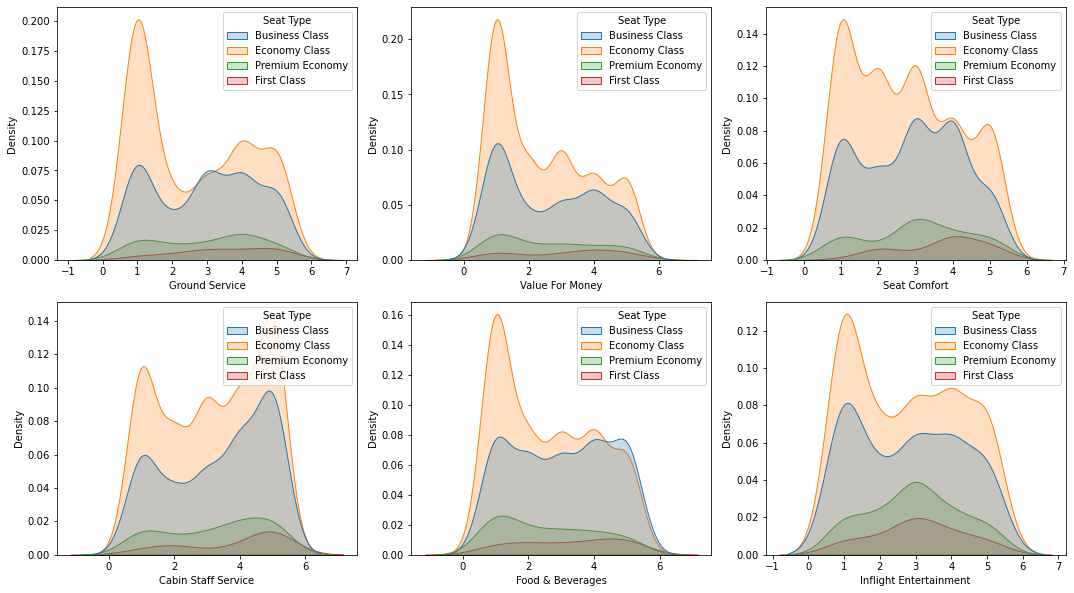

In [97]:
df_stars =  df[['Ground Service' , 'Value For Money','Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment']]
cols = 3  
rows = 3 
fig = plt.figure(figsize=(cols*5, rows*4))
for i, col in enumerate(df_stars):     
    ax=fig.add_subplot(rows,cols,i+1)
    sns.kdeplot(data = df, x = col, hue=df['Seat Type'], fill=True)    
fig.tight_layout()  
plt.show() 

##### sentiment vs traveller type

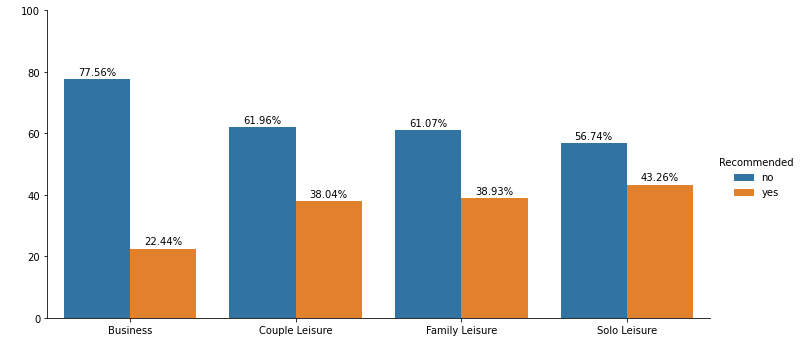

In [93]:
categ_bar_pourcent(df,'Type Of Traveller','Recommended' ,2 )     

##### Type of traveller vs seat type 

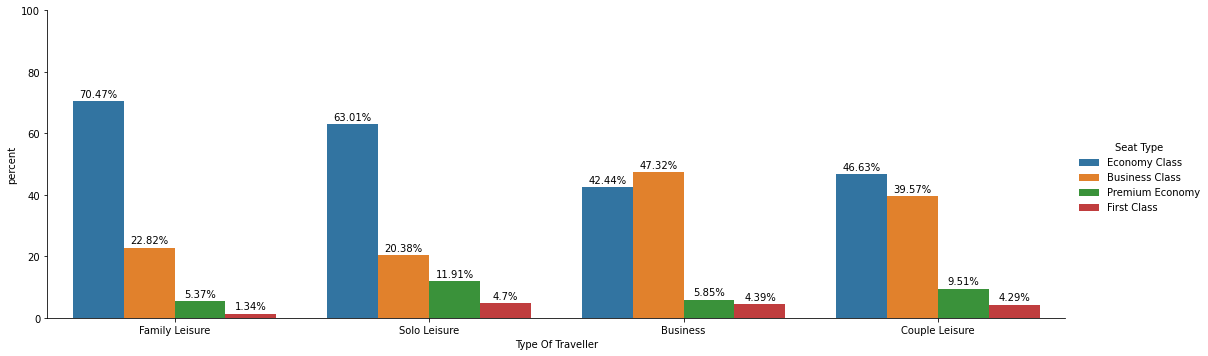

In [95]:
categ_bar_pourcent(df,'Type Of Traveller','Seat Type' ,3 )  

In [62]:
df.Aircraft.value_counts()   
df['Aircraft'].value_counts().nlargest(10)

A320              121
Boeing 777         67
A380               53
Boeing 777-200     40
Boeing 747-400     35
A321               33
Boeing 787         28
Boeing 747         26
Boeing 787-9       21
A319               20
Name: Aircraft, dtype: int64

In [63]:
# top 10 aircrafts 

top_10 = df['Aircraft'].value_counts().nlargest(10)
df_top10_planes = df[df['Aircraft'].isin(top_10.index)]  


##### Aircrafts vs sentiment feedback 

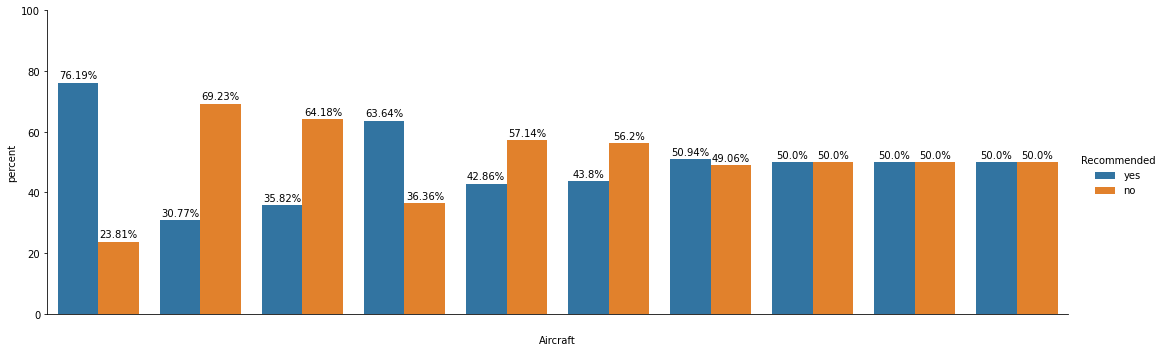

In [105]:
def categ_bar_pourcent(df_,x_,y_,aspect_ , Order = None ) : 
    x,y = x_, y_

    df1 = df_.groupby(x)[y].value_counts(normalize=True) 
    df1 = df1.mul(100) 
    df1 = df1.rename('percent').reset_index()
    df1 = df1.sort_values(['percent', y], ascending=[False, False])

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,aspect=aspect_ , order=Order)
    g.ax.set_ylim(0,100)

    # Set the color of the x-axis tick labels to white
    g.ax.tick_params(axis='x', colors='white')

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() + p.get_width()/2
        txt_y = p.get_height() +0.7   
        g.ax.text(txt_x,txt_y,txt ,ha='center' , va='bottom' ) 

categ_bar_pourcent(df_top10_planes,'Aircraft','Recommended' ,3 ) 


##### Comparing distribution of features between most approved aircraft vs most disapproved one 

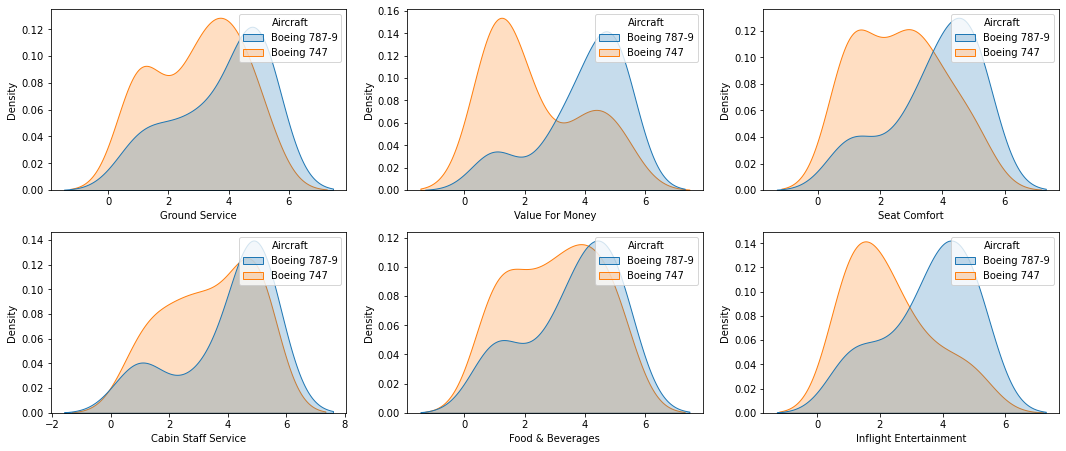

In [65]:
df_stars_hue = df[df['Aircraft'].isin( ['Boeing 787-9' ,'Boeing 747']) ]
df_stars_boeing787_9 = df[df['Aircraft'].isin( ['Boeing 787-9' ,'Boeing 747']) ]
df_stars_boeing787_9 =  df_stars_boeing787_9[['Ground Service' , 'Value For Money','Seat Comfort','Cabin Staff Service','Food & Beverages','Inflight Entertainment']]

cols = 3 
rows = 3
fig = plt.figure(figsize=(cols*5, rows*3))
for i, col in enumerate(df_stars_boeing787_9):   
    ax=fig.add_subplot(rows,cols,i+1)
    #sns.histplot( df, x=col, ax = ax)     
    sns.kdeplot(data = df_stars_boeing787_9, x = col,hue=df_stars_hue['Aircraft'] ,  fill=True)    
fig.tight_layout()  
plt.show()    

##### Distribution of spam comments according to sentiment 

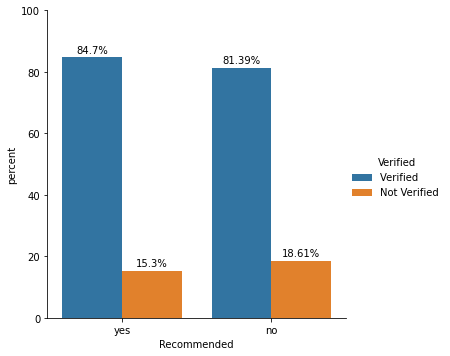

In [66]:
categ_bar_pourcent(df,'Recommended','Verified' ,1 )   
